<a href="https://colab.research.google.com/github/DeeptimaanB/8051_Programs/blob/main/Data_Augmentation_on_Flower_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses= list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/12406418663_af20dc225f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5863698305_04a4277401_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4921988677_e2eb0c9a24_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3171577977_8608282f04_m.jpg')]

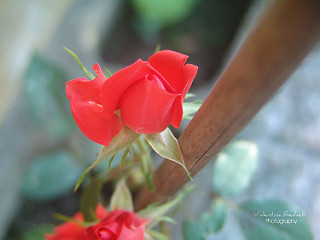

In [ ]:
PIL.Image.open(str(roses[1]))

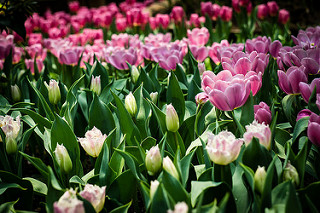

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/12406418663_af20dc225f_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[  1,   1,   1],
        [  3,   1,   1],
        [ 19,  19,   7],
        ...,
        [  1,   2,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  0,   5,   0],
        [  9,   6,   8],
        [ 11,   6,   8],
        ...,
        [  3,   4,   2],
        [  1,   1,   1],
        [  3,   3,   3]],

       [[  0,   6,   0],
        [ 11,   8,  10],
        [ 17,  11,  16],
        ...,
        [  1,   2,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       ...,

       [[ 56,  31,  35],
        [ 66,  50,  43],
        [ 57,  45,  33],
        ...,
        [ 87,  66,  28],
        [ 92,  68,  32],
        [ 97,  72,  38]],

       [[ 88,  84,  56],
        [110, 104,  69],
        [ 94,  82,  48],
        ...,
        [ 89,  69,  28],
        [ 95,  73,  32],
        [100,  74,  37]],

       [[109, 131,  96],
        [125, 132,  95],
        [107,  91,  68],
        ...,
        [ 93,  74,  31],
        [ 95,  73,  32],
        [103,  78,  38]]

In [ ]:
img.shape

(231, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img= cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X[0]

array([[[  2,   2,   1],
        [ 19,  19,   7],
        [ 51,  47,  25],
        ...,
        [  9,   8,   4],
        [  2,   3,   1],
        [  1,   1,   1]],

       [[  4,   6,   3],
        [ 16,  11,  11],
        [ 47,  49,  17],
        ...,
        [  9,   9,   3],
        [  3,   4,   1],
        [  2,   2,   2]],

       [[  9,   8,   4],
        [ 17,  13,   9],
        [ 50,  50,  22],
        ...,
        [  9,   9,   1],
        [  3,   2,   0],
        [  0,   0,   0]],

       ...,

       [[ 54,  36,  41],
        [ 49,  41,  42],
        [ 63,  45,  47],
        ...,
        [ 94,  76,  46],
        [ 87,  67,  31],
        [ 90,  68,  37]],

       [[ 81,  69,  51],
        [ 77,  64,  40],
        [ 85,  61,  40],
        ...,
        [100,  85,  53],
        [ 88,  69,  29],
        [ 97,  72,  35]],

       [[112, 126,  91],
        [100,  82,  60],
        [ 73,  44,  39],
        ...,
        [ 95,  81,  49],
        [ 93,  74,  32],
        [ 99,  76,  35]]

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5
model = Sequential([
                    #convolution layer
                    layers.Conv2D(filters = 16, kernel_size = (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D(),

                    #dense layer
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(num_classes)
])

model.compile( optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 33s 40ms/step - loss: 1.3434 - accuracy: 0.4353
Epoch 2/10
86/86 [==============================] - 3s 41ms/step - loss: 1.0040 - accuracy: 0.6134
Epoch 3/10
86/86 [==============================] - 3s 40ms/step - loss: 0.7975 - accuracy: 0.6973
Epoch 4/10
86/86 [==============================] - 4s 41ms/step - loss: 0.5799 - accuracy: 0.7903
Epoch 5/10
86/86 [==============================] - 3s 41ms/step - loss: 0.3519 - accuracy: 0.8815
Epoch 6/10
86/86 [==============================] - 3s 40ms/step - loss: 0.2264 - accuracy: 0.9273
Epoch 7/10
86/86 [==============================] - 3s 41ms/step - loss: 0.1150 - accuracy: 0.9673
Epoch 8/10
86/86 [==============================] - 3s 41ms/step - loss: 0.0735 - accuracy: 0.9833
Epoch 9/10
86/86 [==============================] - 3s 40ms/step - loss: 0.0409 - accuracy: 0.9913
Epoch 10/10
86/86 [==============================] - 3s 40ms/step - loss: 0.0530 - accuracy: 0.9851


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 2.1837 - accuracy: 0.6307


[2.183738946914673, 0.6307189464569092]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -1.0784538 ,   5.477111  ,   0.3593328 ,   1.3587614 ,
         -2.0220382 ],
       [  4.0697746 ,  -2.6920602 ,  -0.92512786,  -0.846037  ,
          7.353807  ],
       [ -1.2773811 ,  -3.9705377 ,   2.7342384 ,  -0.84609485,
         -1.2347059 ],
       ...,
       [ -7.236862  , -15.877559  ,   7.039529  ,  15.233049  ,
          0.9856588 ],
       [ 11.529064  ,   1.726225  , -12.887195  ,  -5.7947884 ,
          8.564544  ],
       [ -3.4774227 , -21.389147  ,   8.043172  ,  17.303608  ,
         -3.8351665 ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.3885263e-03, 9.7633708e-01, 5.8475928e-03, 1.5886322e-02,
       5.4045627e-04], dtype=float32)>

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

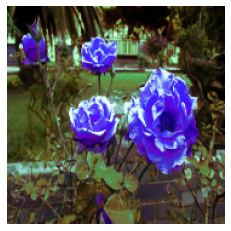

In [ ]:
plt.axis('off')
plt.imshow(X[0])

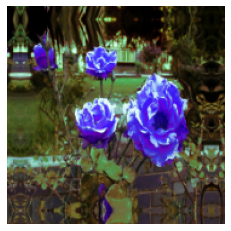

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5
model = Sequential([
                    #convolution layer
                    data_augmentation,
                    layers.Conv2D(filters = 16, kernel_size = (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),

                    #dense layer
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(num_classes)
])

model.compile( optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 5s 44ms/step - loss: 1.3996 - accuracy: 0.4055
Epoch 2/10
86/86 [==============================] - 4s 42ms/step - loss: 1.0892 - accuracy: 0.5567
Epoch 3/10
86/86 [==============================] - 4s 42ms/step - loss: 0.9548 - accuracy: 0.6294
Epoch 4/10
86/86 [==============================] - 4s 42ms/step - loss: 0.8580 - accuracy: 0.6755
Epoch 5/10
86/86 [==============================] - 4s 42ms/step - loss: 0.7996 - accuracy: 0.6944
Epoch 6/10
86/86 [==============================] - 4s 42ms/step - loss: 0.6843 - accuracy: 0.7373
Epoch 7/10
86/86 [==============================] - 4s 42ms/step - loss: 0.6341 - accuracy: 0.7580
Epoch 8/10
86/86 [==============================] - 4s 42ms/step - loss: 0.5675 - accuracy: 0.7838
Epoch 9/10
86/86 [==============================] - 4s 42ms/step - loss: 0.5186 - accuracy: 0.8016
Epoch 10/10
86/86 [==============================] - 4s 41ms/step - loss: 0.4490 - accuracy: 0.8416


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 21ms/step - loss: 0.9769 - accuracy: 0.6547


[0.9768580794334412, 0.6546840667724609]